#  Practical Data Preprocessing Task – Sales Dataset

##  Task Title:
**"Will This Sale Be Successful?"**

##  Objective:
You are provided with a real-world retail dataset. Your task is to **prepare the data for a machine learning classification model** that predicts whether a customer will purchase **more than 3 items in a single transaction**.

You will perform a complete preprocessing pipeline from data exploration to handling imbalances, with visualizations and clear justifications for each step.

---

##  Dataset Description:

Dataset link: [Customer Shopping Dataset – Retail Sales Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset)

The dataset contains sales transactions from a retail environment with the following columns:

| Column Name       | Description                                                              |
|------------------|---------------------------------------------------------------------------|
| `invoice_no`      | Unique identifier for the invoice                                         |
| `customer_id`     | Unique identifier for each customer                                       |
| `gender`          | Gender of the customer (`Male`, `Female`)                                |
| `age`             | Age of the customer                                                      |
| `category`        | Category of the purchased product                                        |
| `quantity`        | Number of items purchased in the transaction                            |
| `price`           | Unit price of the product in Turkish Lira                                |
| `payment_method`  | Payment method used (e.g., `Cash`, `Credit Card`, `Debit Card`)         |
| `invoice_date`    | Date of the transaction                                                  |
| `shopping_mall`   | Name of the mall where the transaction occurred                         |

---

##  Task Instructions:

You must complete the following steps **in order**, and write clear explanations (in Markdown cells) alongside your code in a Jupyter Notebook.

### 1. Load & Explore the Data
- Load the dataset.
- Display first few rows and general information.
- Summary statistics of numerical and categorical features.
- Visualizations:
  - Histogram of `age`, `price`, and `quantity`.
  - Countplot for `gender`, `category`, and `payment_method`.

---

### 2. Clean the Data
- Remove duplicate records if any.
- Identify and remove/fix unrealistic values (e.g., negative or 0 prices, age outliers).
- Provide a rationale for cleaning decisions.

---

### 3. Handle Missing Data
- Check for missing values.
- Apply at least two different strategies to handle missing data:
  - Drop
  - Fill (e.g., with median, mode, etc.)
- Justify why each method was chosen.

---

### 4. Feature Engineering
- Create a new column: `total_spent = quantity * price`
- Create a new binary target column:
  - 1 if `quantity > 3`, otherwise 0
  - Name the new column `target`

---

### 5. Encode Categorical Variables
- Encode all applicable categorical features using suitable encoding techniques.
- Explain your choice (e.g., Label Encoding vs OneHot Encoding).

---

### 6. Detect & Handle Outliers
- Use visualizations (e.g., boxplots) to detect outliers in numerical columns like `age`, `price`, and `total_spent`.
- Apply IQR or another statistical method to handle outliers.

---

### 7. Feature Scaling
- Apply feature scaling to numerical columns like `age`, `price`, and `total_spent`.
- Use either `StandardScaler` or `MinMaxScaler`.
- Show distributions before and after scaling.

---

### 8. Train-Test Split
- Split the data into training and testing sets (80/20).
- Use `stratify=y` to preserve class distribution.

---

### 9. Deal with Imbalanced Classes
- Check class distribution of your `target` variable.
- If imbalanced, apply resampling techniques:
  - Random UnderSampling or SMOTE
- Show class distribution before and after resampling.

---
    
## Deliverables:
At the end of the session, you should submit:
- A complete Jupyter Notebook with:
  - Well-structured code
  - Clear explanations using Markdown
  - Visualizations embedded
- A short reflection answering:
  - What challenges did you face?
  - What did you learn from this task?
  - What would you do differently if the dataset was larger/messier?

---

## Hints:
- Clean code is important! Keep your notebook readable.
- Justify your preprocessing decisions.
- Label your visualizations properly.

---

> **Good luck! This is your chance to practice real-world data preparation and analysis.**


# 1. Load & Explore the Data

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("customer_shopping_data.csv")

In [25]:
df.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [10]:
df.info

<bound method DataFrame.info of       invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19

In [12]:
df.shape

(99457, 10)

In [52]:
numerical_cols = df.select_dtypes(include = ["int64", "float64"])
numerical_cols

,age,quantity,price
0,28,5,1500.40
1,21,3,1800.51
2,20,1,300.08
3,66,5,3000.85
4,53,4,60.60
...,...,...,...
99452,45,5,58.65
99453,27,2,10.46
99454,63,2,10.46
99455,56,4,4200.00


In [58]:
numerical_cols.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [53]:
categorical_cols = df.select_dtypes(include = "object")

In [55]:
categorical_cols.describe()

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,797,10
top,I232867,C273973,Female,Clothing,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,34487,44447,159,19943


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hisotgrams 

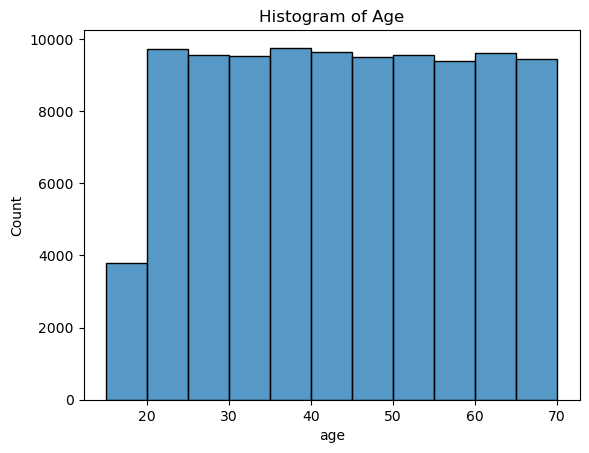

In [100]:
age_bins = []
for bin in range(15, df['age'].max()+5, 5):
    age_bins.append(bin)
sns.histplot(data = df, x = 'age', bins = age_bins)
plt.title('Histogram of Age')
plt.show()

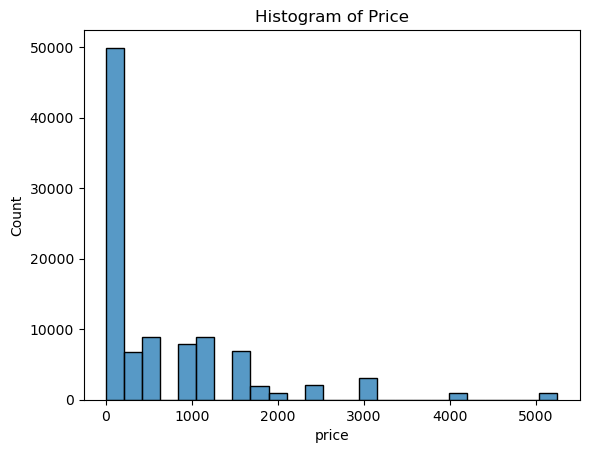

In [108]:
sns.histplot(data = df, x = 'price', bins = 25)
plt.title('Histogram of Price')
plt.show()

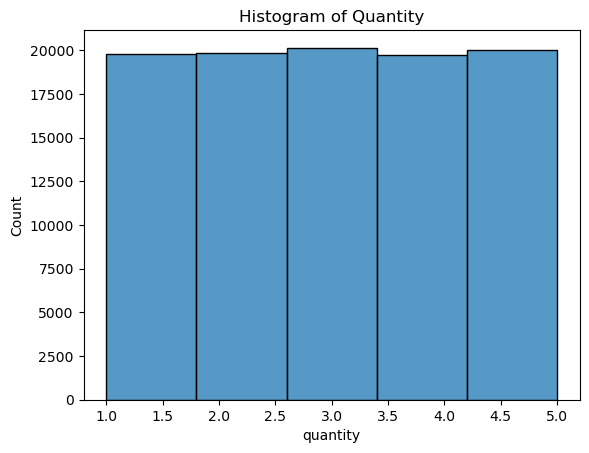

In [113]:
sns.histplot(data = df, x = 'quantity', bins = 5)
plt.title('Histogram of Quantity')
plt.show()

## It seems that the quantity data is discrete, so the bar chart [count plot in seaborn] will be a better choice than histogram

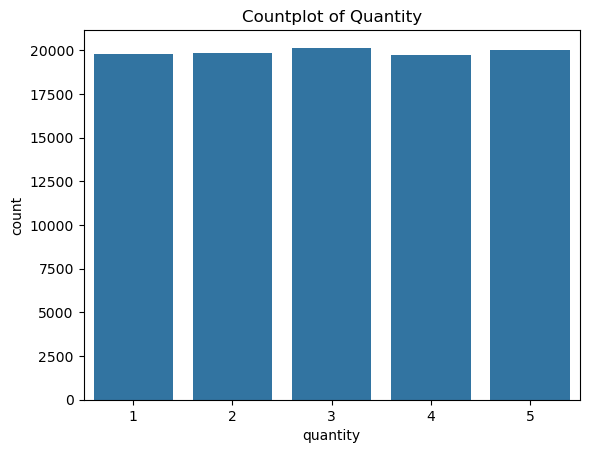

In [117]:
sns.countplot(data = df, x = 'quantity')
plt.title('Countplot of Quantity')
plt.show()

# Countplots

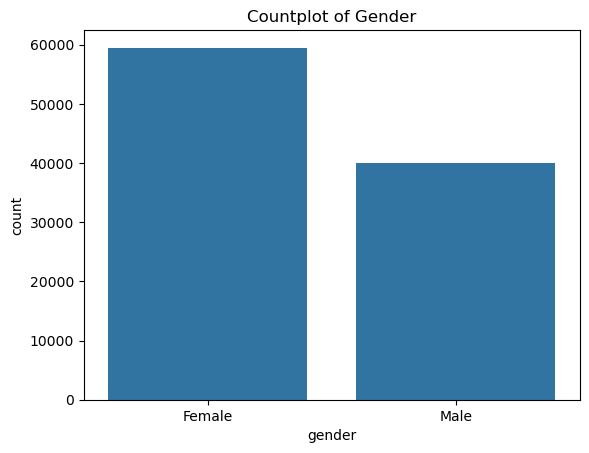

In [118]:
sns.countplot(data = df, x = 'gender')
plt.title('Countplot of Gender')
plt.show()

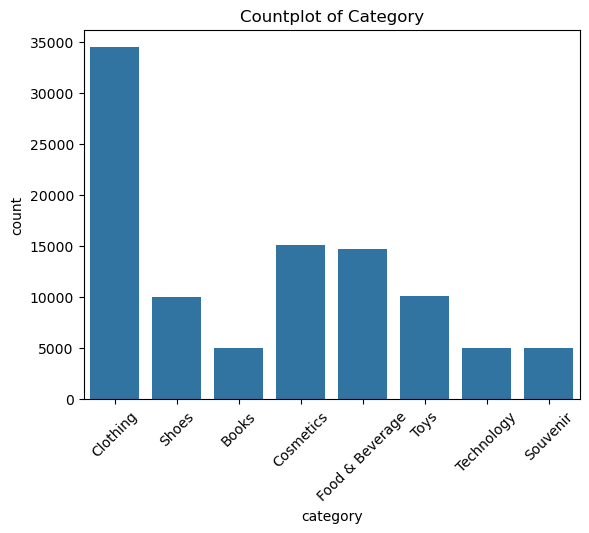

In [121]:
sns.countplot(data = df, x = 'category')
plt.title('Countplot of Category')
plt.xticks(rotation=45)
plt.show()

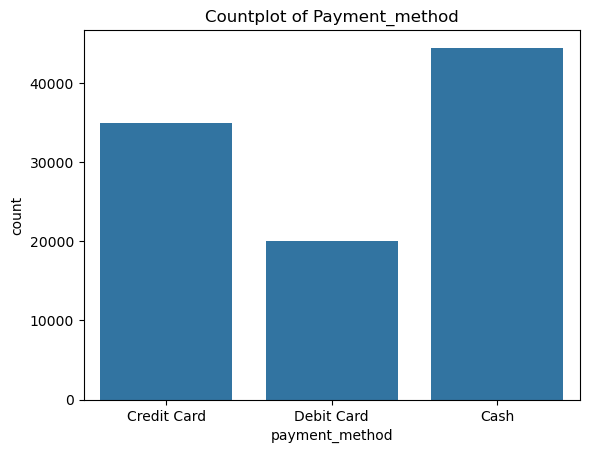

In [122]:
sns.countplot(data = df, x = 'payment_method')
plt.title('Countplot of Payment_method')
plt.show()